In [1]:
# load laibary
import pandas as pd
import numpy as np

# load visulaization laibary
import matplotlib.pyplot as plt
import seaborn as sns

# load warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
# load dataset
df=pd.read_csv("comment.csv")

In [4]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
# check null values
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

no null values are present in dataset

In [6]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


1. In our dataset number of rows are 8 and columns are 159571.
2. Number of object data out of 8 is 2 and int data is 5.
3. No null values are present in dataset.

<AxesSubplot:>

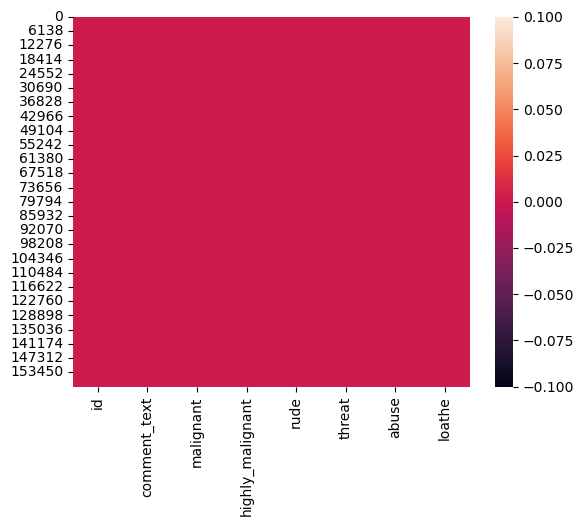

In [7]:
# check null values by plotting heatmap
sns.heatmap(df.isnull())

No null values are present in dataset

In [8]:
# white space in target
df.loc[df['malignant']==" "]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe


No white spaces are availabel in dataset

In [9]:
# check shape
df.shape

(159571, 8)

we have 159571 rows and 8 columns

In [10]:
# unique values in dataset
df.nunique().to_frame('No of unique values')

,No of unique values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


As we see that in id number of unique values are equal to rows values. This is not useful for us. so we drop it later during when we perform data cleaning transform

In [11]:
# check duplicate values in dataset
duplicate=df[df.duplicated()]

In [12]:
print('Duplicate rows:',duplicate)

Duplicate rows: Empty DataFrame
Columns: [id, comment_text, malignant, highly_malignant, rude, threat, abuse, loathe]
Index: []


No duplicated values are present in dataset

In [13]:
# check number of counts in datset
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0000997932d777bf    1
392f4a9354209ec6    1
3925db56b320ccc6    1
392753482da03615    1
3927dd49d646f41f    1
                   ..
8e30b2de937e8de9    1
8e30fd3564ba0b4a    1
8e328798f6397fcc    1
8e34742563534edd    1
fff46fc426af1f9a    1
Name: id, Length: 159571, dtype: int64


Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string

In [15]:
# counts length of words in comment text 
df['length']=df['comment_text'].str.len()

In [16]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [17]:
!pip install wordcloud

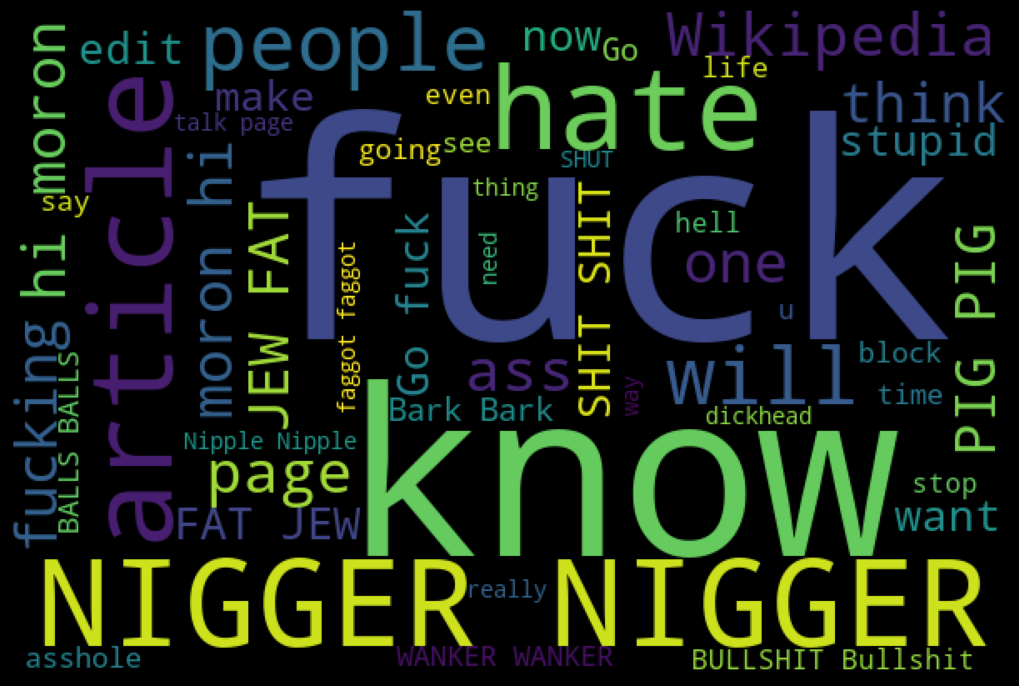

In [18]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
col_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [20]:
# from all reaction we make our target columns
df['bad'] =df[col_target].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [21]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,bad
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,0


In [22]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [23]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,bad
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,0


In [24]:
# Data cleaning
df.drop('id',axis=1,inplace=True)

In [25]:
# Check statistic
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,length,bad
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,0.101679
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,1.000000


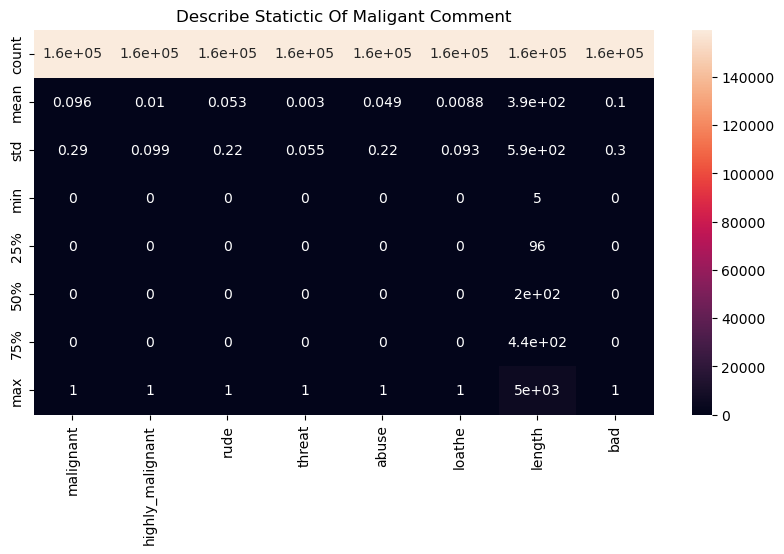

In [26]:
# plot into heatmap visulaization
plt.figure(figsize=(10,5))
sns.heatmap(df.describe(),annot=True)
plt.title('Describe Statictic Of Maligant Comment')
plt.show()

# Correlation with dataset

<AxesSubplot:>

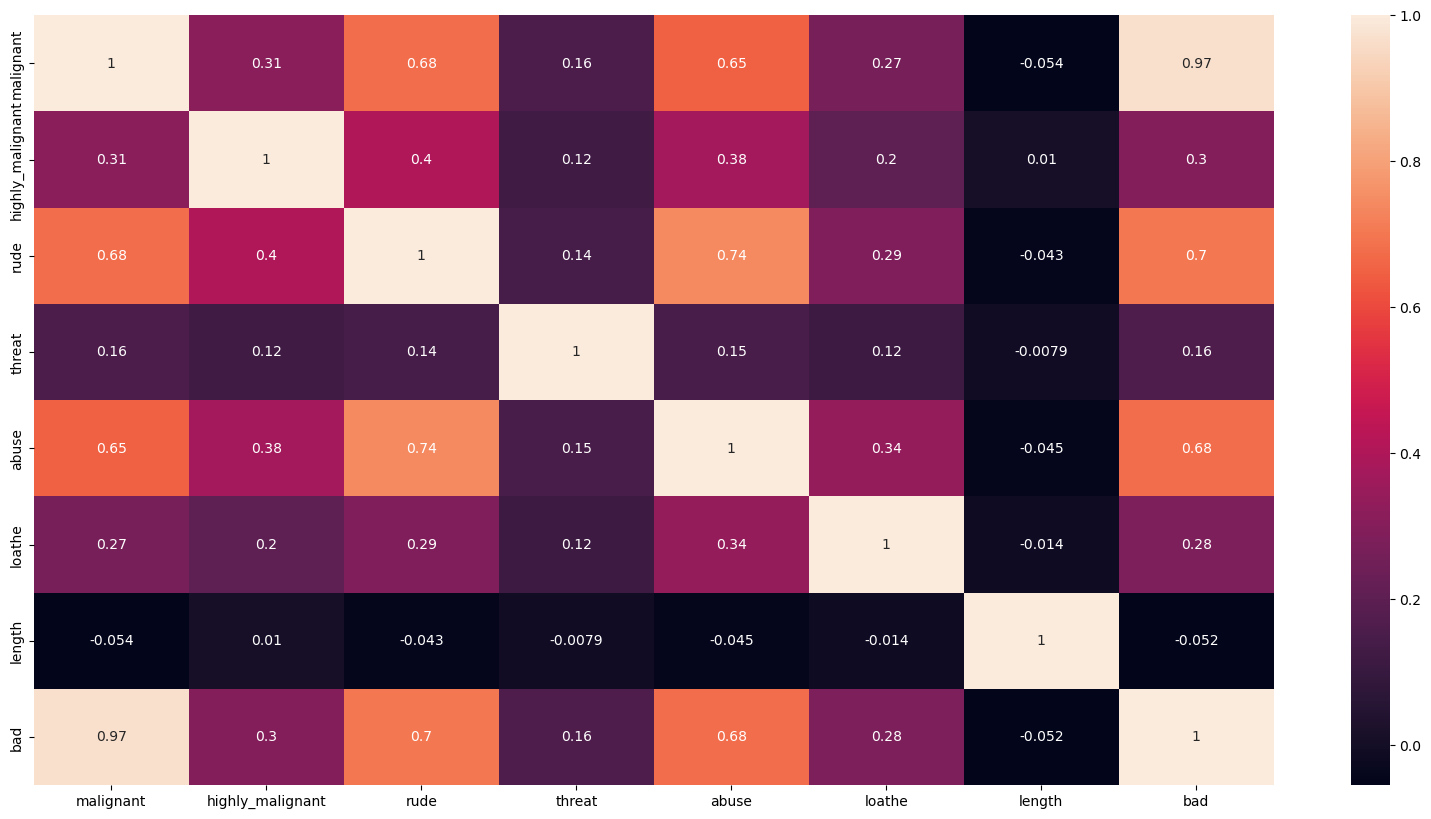

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.shape

(159571, 9)

In [29]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=28,test_size=.20)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((127656, 10000), (31915, 10000), (127656,), (31915,))

In [31]:
# LogisticRegression
LO = LogisticRegression()
LO.fit(x_train, y_train)
y_pred_train = LO.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LO.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9594613649182178
Test accuracy is 0.958358138806204
[[28574   141]
 [ 1188  2012]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28715
           1       0.93      0.63      0.75      3200

    accuracy                           0.96     31915
   macro avg       0.95      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



1. Bad word not chances is 96%.
2. Bad word chances is 93%
3. Model accuracy give near 95.94%
4. Model give avg.accuracy is 95%
5. For more and better accuracy we find another models

In [32]:
# Decion Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9989581374945166
Test accuracy is 0.9407175309415635
[[27817   898]
 [  994  2206]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28715
           1       0.71      0.69      0.70      3200

    accuracy                           0.94     31915
   macro avg       0.84      0.83      0.83     31915
weighted avg       0.94      0.94      0.94     31915



1. Bad word not chances is 97%.
2. Bad word chances is 71%
3. Model accuracy give near 99.89%
4. Model give avg.accuracy is 94.07%
5. For more and better accuracy we find another models

In [33]:
# Support vector classifier
SV = SVC()
SV.fit(x_train, y_train)
y_pred_train = SV.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = SV.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.980643291345491
Test accuracy is 0.959016136612878
[[28557   158]
 [ 1150  2050]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28715
           1       0.93      0.64      0.76      3200

    accuracy                           0.96     31915
   macro avg       0.94      0.82      0.87     31915
weighted avg       0.96      0.96      0.96     31915



1. Bad word not chances is 96%.
2. Bad word chances is 93%
3. Model accuracy give near 98.06%
4. Model give avg.accuracy is 95.90%
5. For more and better accuracy we find another models

In [34]:
# Kneighbors classifier
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
y_pred_train = KN.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = KN.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1051, 127656) and data type float64

In [35]:
# Ada Bost Classifier
AD = AdaBoostClassifier()
AD.fit(x_train, y_train)
y_pred_train = AD.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = AD.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9455098076079463
Test accuracy is 0.9454801817327275
[[28486   229]
 [ 1511  1689]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28715
           1       0.88      0.53      0.66      3200

    accuracy                           0.95     31915
   macro avg       0.92      0.76      0.82     31915
weighted avg       0.94      0.95      0.94     31915



1. Bad word not chances is 95%.
2. Bad word chances is 88%
3. Model accuracy give near 94.55%
4. Model give avg.accuracy is 94.54%
5. For more and better accuracy we find another models

In [36]:
# GradientBoostingClassifier
GR = GradientBoostingClassifier()
GR.fit(x_train, y_train)
y_pred_train = GR.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = GR.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9400576549476719
Test accuracy is 0.9399342002193326
[[28642    73]
 [ 1844  1356]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28715
           1       0.95      0.42      0.59      3200

    accuracy                           0.94     31915
   macro avg       0.94      0.71      0.78     31915
weighted avg       0.94      0.94      0.93     31915



1. Bad word not chances is 94%.
2. Bad word chances is 95%
3. Model accuracy give near 94.00%
4. Model give avg.accuracy is 94.00%
5. For more and better accuracy we find another models

In [37]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9989189697311525
Test accuracy is 0.9566034779884067
[[28315   400]
 [  985  2215]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28715
           1       0.85      0.69      0.76      3200

    accuracy                           0.96     31915
   macro avg       0.91      0.84      0.87     31915
weighted avg       0.95      0.96      0.95     31915



1. Bad word not chances is 97%.
2. Bad word chances is 85%
3. Model accuracy give near 99.89%
4. Model give avg.accuracy is 95.66%
5. For more and better accuracy we find another models

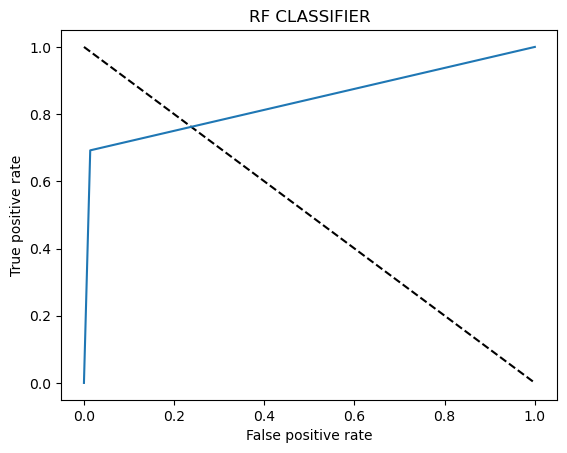

In [41]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [43]:
test=pd.read_csv('comment_test.csv')

In [44]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [45]:
prediction=RF.predict(test_data)
prediction

array([1, 0, 1, ..., 0, 0, 1])

In [46]:
import joblib
joblib.dump(RF,"malificient_comment.pkl")

['malificient_comment.pkl']